smart_hans_08022022_194751_7_250-281_08_gny_.csv
smart_hans_08022022_192131_8_280-310_08_wny_.csv
smart_hans_08022022_190823_13_429-460_08_mny_person_hat_nicht_auf_huf_geschaut.csv
smart_hans_07312022_170216_4_149-178_08_mgy_furz_lachen_am_ende.csv
smart_hans_08022022_182746_7_242-273_08_wny_.csv
smart_hans_08022022_184110_5_176-207_08_mgy_.csv
smart_hans_07312022_185231_4_153-182_08_mny_.csv
smart_hans_07312022_174011_10_330-358_08_mny_.csv
smart_hans_08022022_192219_4_154-184_08_wny_person_hat_nach_12_gewackelt.csv
smart_hans_08022022_191248_9_307-336_08_mny_.csv
smart_hans_08022022_205208_8_276-308_08_wnn_.csv
smart_hans_08022022_191134_12_403-433_08_mny_.csv
smart_hans_08022022_185137_12_400-430_08_mny_.csv
smart_hans_08022022_172713_13_435-465_08_mgn_.csv
smart_hans_08022022_211022_9_314-345_08_mgy_.csv
smart_hans_07312022_164838_8_276-305_08_mgy_klatschen_8_ende.csv
smart_hans_08022022_184808_8_276-305_08_mny_.csv
smart_hans_08022022_195222_3_123-154_08_gny_.csv
smart_hans_080220

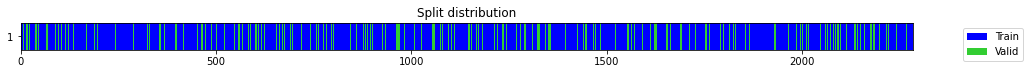

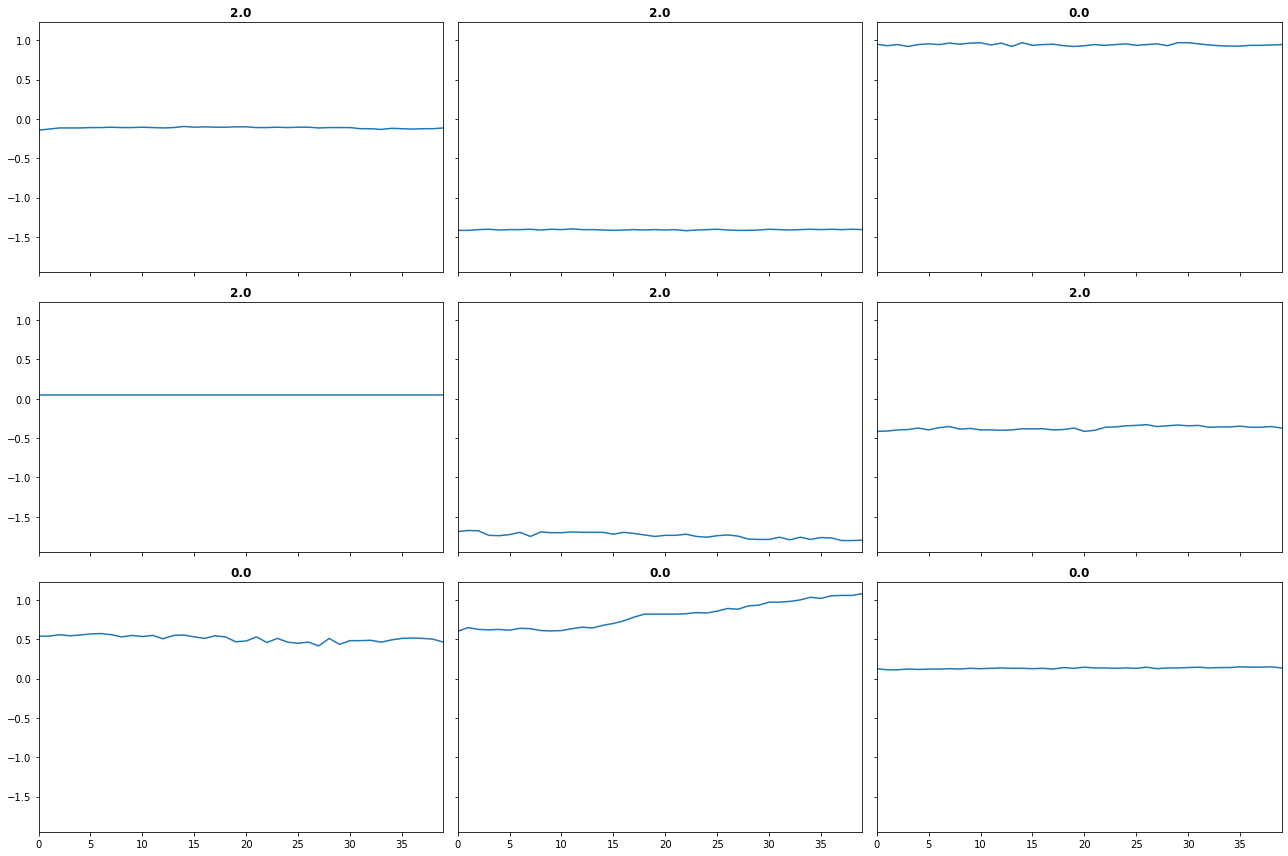

In [2]:
from tsai.all import *
import pandas as pd
from datenverarbeitung import scenario1, scenario2, scenario3

train_df, test_df = scenario1.get_scenario_1("/Users/adi/Documents/code/smart_hans/Machine_learning/datenverarbeitung/daten/gesammelt")


df = pd.concat([test_df, train_df], ignore_index=True)
X, y = df2xy(df, target_col='target')

splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits


# X_train, y_train = df2xy(train_df, target_col='target')
# np.shape(X)
# test_eq(X_test.shape, (60, 1, 40))
# test_eq(y_test.shape, (60, ))


tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

dls.show_batch(sharey=True)

In [22]:
model = InceptionTime(dls.vars, dls.c)
learn = ts_learner(dls, model, metrics=accuracy, train_metrics=True)
learn.save('stage0')

Path('models/stage0.pth')

SuggestedLRs(valley=0.0004786300996784121)

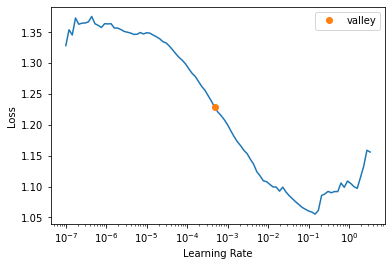

In [23]:
learn.load('stage0')
learn.lr_find()

In [24]:
learn.fit_one_cycle(25, lr_max=1e-3)
learn.save('stage1')

epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,1.098683,0.396205,1.075389,0.461707,00:07
1,0.991780,0.543527,0.947849,0.501094,00:07
2,0.940460,0.525670,0.935506,0.498906,00:07
3,0.913202,0.538504,0.914826,0.503282,00:07
4,0.898960,0.552455,0.893081,0.522976,00:07
5,0.889740,0.549107,0.902216,0.522976,00:07
6,0.882989,0.551897,0.987810,0.522976,00:07
7,0.879358,0.552455,0.911109,0.522976,00:07
8,0.879058,0.542969,0.913629,0.522976,00:08
9,0.878346,0.550223,0.919544,0.505470,00:07


Path('models/stage1.pth')

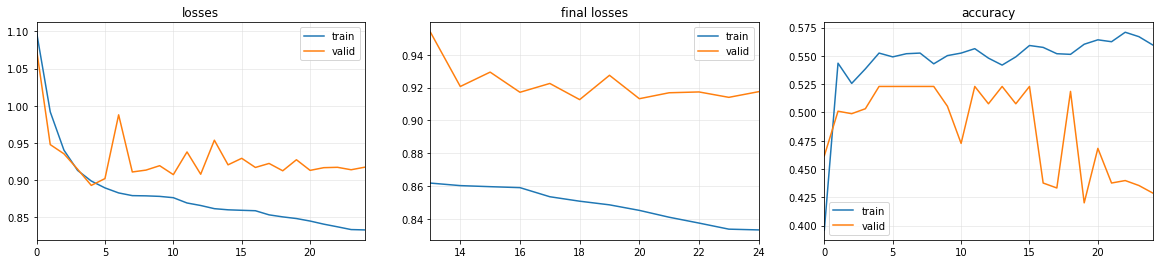

In [25]:
learn.recorder.plot_metrics()

In [27]:
learn.show_results()
learn.plot_metrics()

not enough values to plot a chart


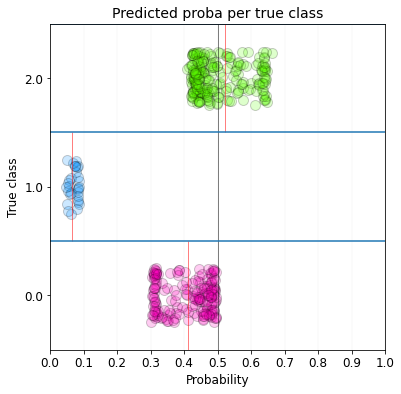

In [28]:
learn.show_probas()
#was sagt probability aus? accuracy vs probability?

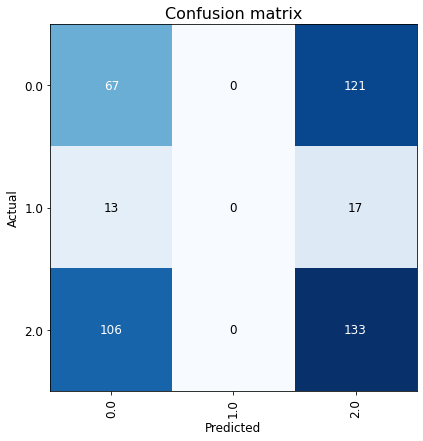

In [16]:
learn.plot_confusion_matrix()

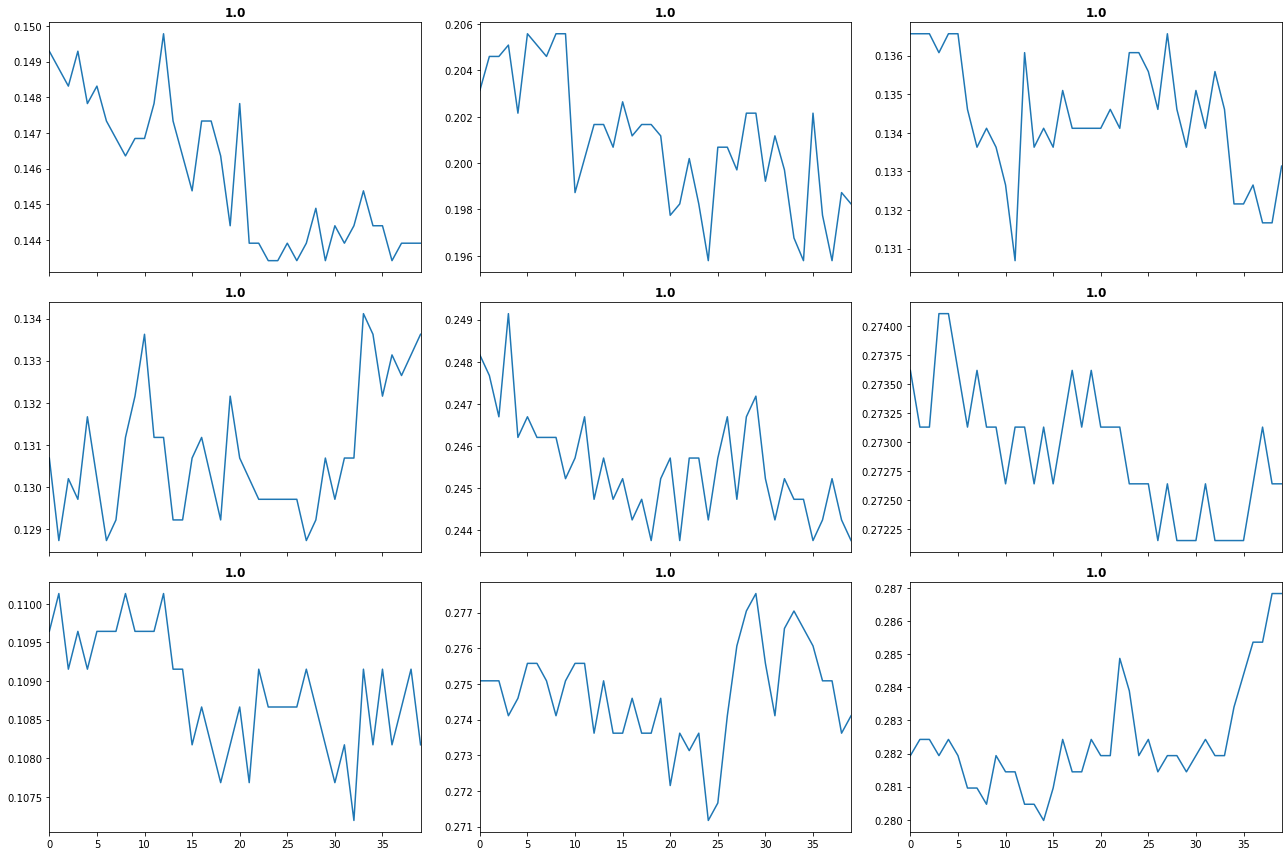

In [15]:
learn.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)